In [166]:
import seaborn as sns
pd.set_option('display.max_rows', 25)
pd.set_option('display.max_columns', 100)
sns.set_style('darkgrid')
%matplotlib inline
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [139]:
HR_all = pd.read_csv('/Users/antoinemarthey/Desktop/Data Science/Kaggle/HR/HR_comma_sep.csv')
print(HR_all.head())

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  sales  \
0                   3              0     1                      0  sales   
1                   6              0     1                      0  sales   
2                   4              0     1                      0  sales   
3                   5              0     1                      0  sales   
4                   3              0     1                      0  sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4 

In [140]:
HR_all.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [141]:
HR_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [142]:
columns= HR_all.columns.tolist()
columns

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'sales',
 'salary']

In [143]:
size_observation = HR_all.shape[0]
size_features = HR_all.shape[1]

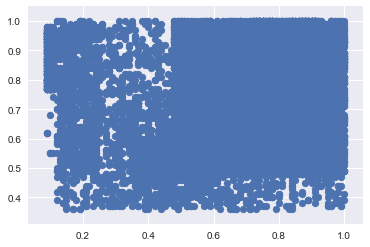

In [144]:
plt.figure(1)
plt.scatter(HR_all.satisfaction_level, HR_all.last_evaluation)
plt.show()

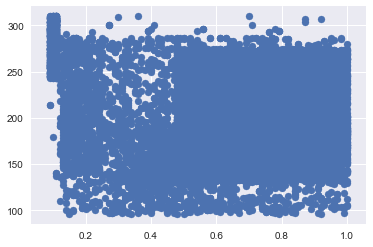

In [145]:
plt.figure(2)
plt.scatter(HR_all.satisfaction_level, HR_all.average_montly_hours)
plt.show()

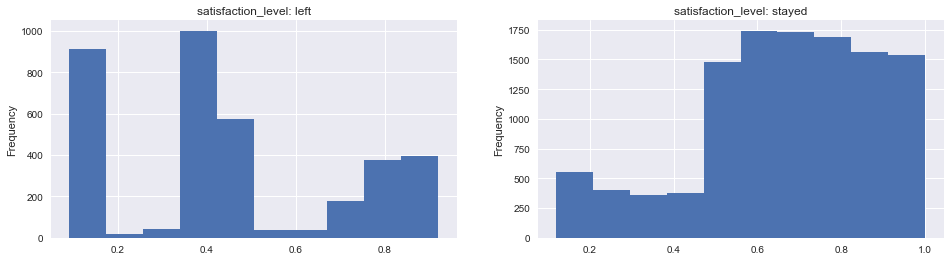

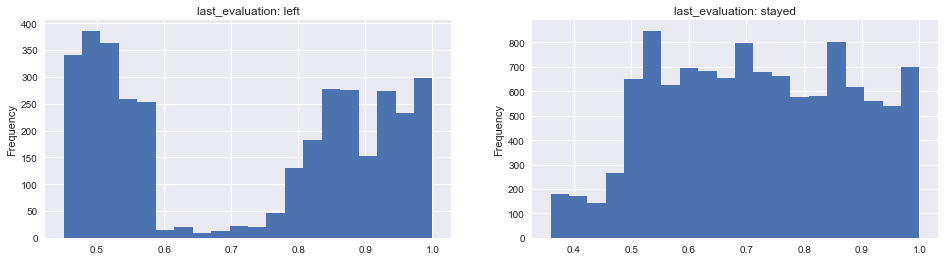

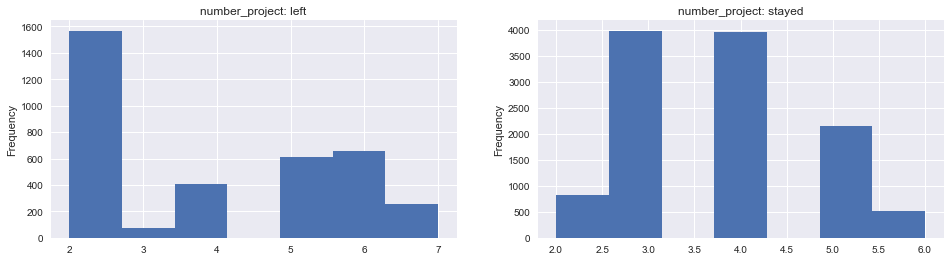

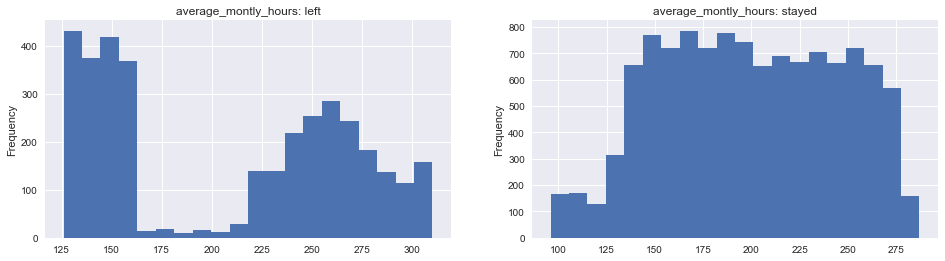

In [146]:
mask = HR_all.left==1

def make_hist(col, bins):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,4))
    HR_all[mask][col].plot(kind='hist', bins=bins, title=col +': left', ax=axes[0])
    HR_all[~mask][col].plot(kind='hist', bins=bins, title=col + ': stayed', ax=axes[1])
    plt.plot()

cols = [
    ('satisfaction_level', 10),
    ('last_evaluation', 20),
    ('number_project', 7),
    ('average_montly_hours', 20),
]

for col, bins in cols:
    make_hist(col, bins)

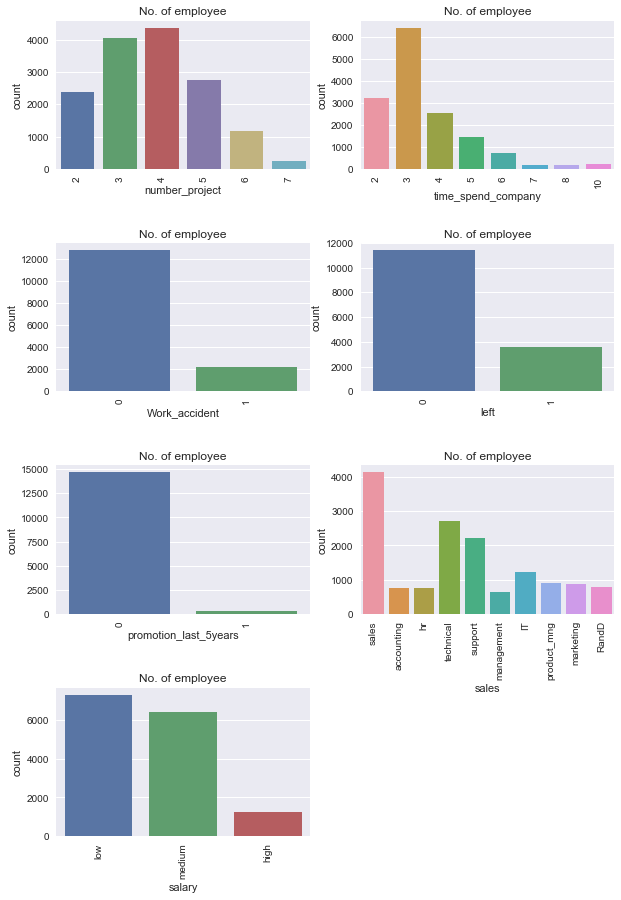

In [147]:
categorical=['number_project','time_spend_company','Work_accident','left', 'promotion_last_5years','sales','salary']
fig=plt.subplots(figsize=(10,15))
length=len(categorical)
for i,j in itertools.zip_longest(categorical,range(length)): 
    plt.subplot(np.ceil(length/2),2,j+1)
    plt.subplots_adjust(hspace=.5)
    sns.countplot(x=i,data = HR_all)
    plt.xticks(rotation=90)
    plt.title("No. of employee")

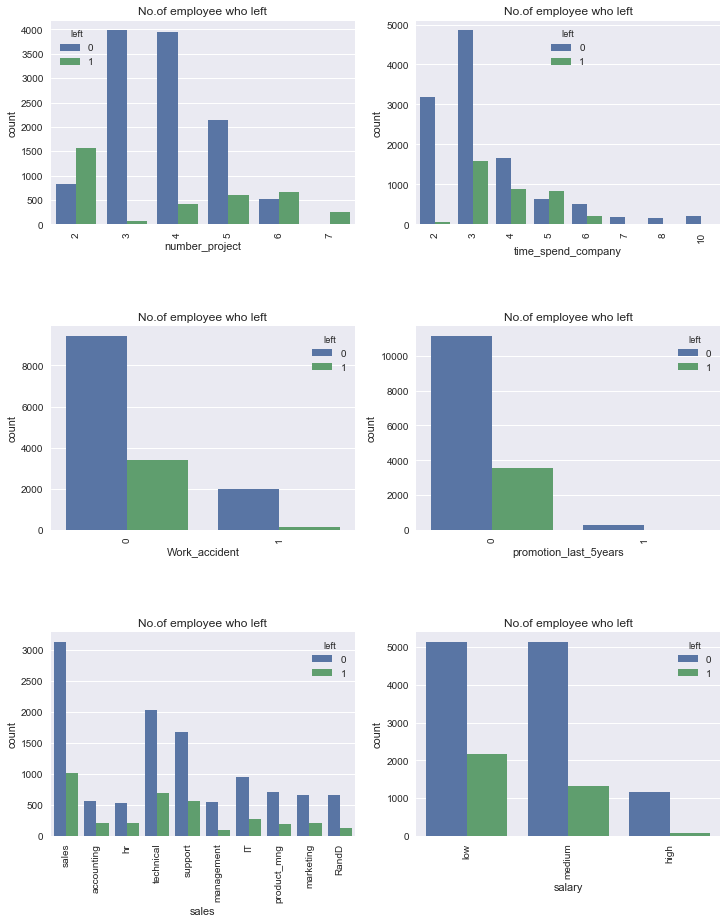

In [148]:
categorical=['number_project','time_spend_company','Work_accident','promotion_last_5years','sales','salary'] 
fig=plt.subplots(figsize=(12,15))
length=len(categorical) 
for i,j in itertools.zip_longest(categorical,range(length)): 
    plt.subplot(np.ceil(length/2),2,j+1) 
    plt.subplots_adjust(hspace=.5) 
    sns.countplot(x=i,data = HR_all,hue="left") 
    plt.xticks(rotation=90) 
    plt.title("No.of employee who left")

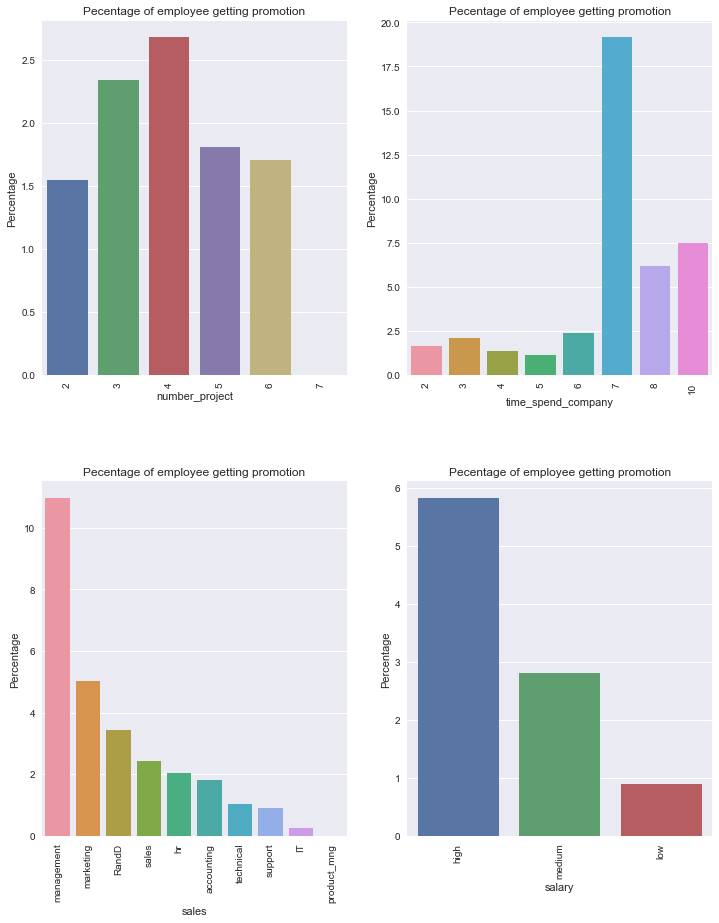

In [149]:
fig=plt.subplots(figsize=(12,15))
categorical=['number_project','time_spend_company','sales','salary']
length=len(categorical)
for i,j in itertools.zip_longest(categorical,range(length)):
    Proportion_of_data = HR_all.groupby([i])['promotion_last_5years'].agg(lambda x: (x==1).sum()).reset_index()
    Proportion_of_data1=HR_all.groupby([i])['promotion_last_5years'].count().reset_index() 
    Proportion_of_data2 = pd.merge(Proportion_of_data,Proportion_of_data1,on=i) 
    Proportion_of_data2["Proportion"]=(Proportion_of_data2['promotion_last_5years_x']/Proportion_of_data2['promotion_last_5years_y'])*100 
    Proportion_of_data2=Proportion_of_data2.sort_values(by="Proportion",ascending=False).reset_index(drop=True)
    plt.subplot(np.ceil(length/2),2,j+1)
    plt.subplots_adjust(hspace=.3)
    sns.barplot(x=i,y='Proportion',data=Proportion_of_data2)
    plt.xticks(rotation=90)
    plt.title("Pecentage of employee getting promotion")
    plt.ylabel('Percentage')

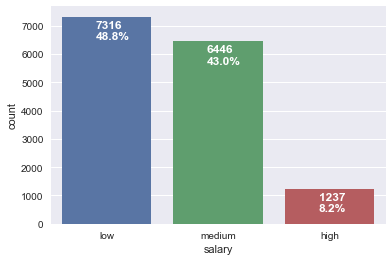

In [150]:
department_plt = sns.countplot(HR_all.salary, order = HR_all.salary.value_counts().index);

for p in department_plt.patches:
    department_plt.annotate(str( int(p.get_height()) ) + "\n" + str(round( (100.0* p.get_height()) /HR_all.salary.count(), 1) )+ "%", 
                                (p.get_x() + 0.3, p.get_height()-800),
                                color='white', fontsize=12, fontweight='bold')

In [151]:
HR_all_num = pd.get_dummies(HR_all, prefix=['sales', 'salary'])
result = HR_all_num['left']
del HR_all_num['left']

In [152]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score 
le=LabelEncoder()
HR_all['salary']=le.fit_transform(HR_all['salary'])
HR_all['sales']=le.fit_transform(HR_all['sales'])

In [153]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.svm import SVC

In [154]:
def Classification_model(model,Data,x,y): 
    train,test = train_test_split(Data,test_size= 0.33)
    train_x = Data.ix[train.index,x] 
    train_y = Data.ix[train.index,y] 
    test_x = Data.ix[test.index,x] 
    test_y = Data.ix[test.index,y]
    model.fit(train_x,train_y.values.ravel())
    pred=model.predict(test_x)
    accuracy=accuracy_score(test_y,pred)
    return accuracy

In [155]:
All_features=['satisfaction_level',
'number_project',
'time_spend_company',
'average_montly_hours',
'last_evaluation',
'sales',
'salary',
'Work_accident',       
'promotion_last_5years']
print(All_features)
Important_features = ['satisfaction_level',
'number_project',
'time_spend_company',
'average_montly_hours',
'last_evaluation']
print(Important_features)
Pred_var = ["left"]
print(Pred_var)

['satisfaction_level', 'number_project', 'time_spend_company', 'average_montly_hours', 'last_evaluation', 'sales', 'salary', 'Work_accident', 'promotion_last_5years']
['satisfaction_level', 'number_project', 'time_spend_company', 'average_montly_hours', 'last_evaluation']
['left']


In [156]:
models=["RandomForestClassifier","KNN","Logistic_Regression","Support_Vector"]
Classification_models = [RandomForestClassifier(n_estimators=100),knn(n_neighbors=7),LogisticRegression(),SVC()]
Model_Accuracy = []
for model in Classification_models:
    Accuracy=Classification_model(model,HR_all,All_features,Pred_var)
    Model_Accuracy.append(Accuracy)
print(Model_Accuracy)

[0.99010101010101015, 0.93010101010101009, 0.75676767676767676, 0.95090909090909093]


In [157]:
models=["RandomForestClassifier","KNN","Logistic_Regression","Support_Vector"]
Classification_models = [RandomForestClassifier(n_estimators=100),knn(n_neighbors=7),LogisticRegression(),SVC()]
Model_Accuracy_all_features = []
Model_Accuracy_important_features = []
for model in Classification_models:
    Accuracy_all=Classification_model(model,HR_all,All_features,Pred_var)
    Model_Accuracy_all_features.append(Accuracy_all)
for model in Classification_models:
    Accuracy_important=Classification_model(model,HR_all,Important_features,Pred_var)
    Model_Accuracy_important_features.append(Accuracy_important)
print(Model_Accuracy_all_features)
print(Model_Accuracy_important_features)

[0.98949494949494954, 0.92808080808080806, 0.7721212121212121, 0.94505050505050503]
[0.99090909090909096, 0.94646464646464645, 0.76000000000000001, 0.95676767676767682]


In [158]:
Accuracy_with_all_features = pd.DataFrame({ "Classification Model" :models,"Accuracy with all features":Model_Accuracy_all_features})
Accuracy_with_important_features = pd.DataFrame({ "Classification Model" :models,"Accuracy with important features":Model_Accuracy_important_features})

In [159]:
Accuracy_with_all_features.sort_values(by="Accuracy with all features",ascending=False).reset_index(drop=True)

,Accuracy with all features,Classification Model
0,0.989495,RandomForestClassifier
1,0.945051,Support_Vector
2,0.928081,KNN
3,0.772121,Logistic_Regression


In [160]:
Accuracy_with_important_features.sort_values(by="Accuracy with important features",ascending=False).reset_index(drop=True)

,Accuracy with important features,Classification Model
0,0.990909,RandomForestClassifier
1,0.956768,Support_Vector
2,0.946465,KNN
3,0.760000,Logistic_Regression


In [161]:
from sklearn.model_selection import GridSearchCV 
def Classification_model_GridSearchCV(model,Data,x,y,params):
    data_x = Data.ix[:,x]  
    data_y = Data.ix[:,y] 
    data_y=data_y.values.ravel()
    clf = GridSearchCV(model,params,scoring="accuracy",cv=5, n_jobs=-1, verbose=3)
    clf.fit(data_x,data_y)
    print("best score is :")
    print(clf.best_score_)
    print('')
    print("best estimator is :")
    print(clf.best_estimator_)
    return (clf.best_score_)

In [162]:
models=["RandomForestClassifier","Gaussian Naive Bays","KNN","Logistic_Regression","Support_Vector"]
Model_Accuracy=[]
model = RandomForestClassifier()
param_grid = {'n_estimators':(70,80,90,100),'criterion':('gini','entropy'),'max_depth':[25,30]}
Accuracy=Classification_model_GridSearchCV(model,HR_all,Important_features,Pred_var,param_grid)
Model_Accuracy.append(Accuracy)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] criterion=gini, max_depth=25, n_estimators=70 ...................
[CV] criterion=gini, max_depth=25, n_estimators=70 ...................
[CV] criterion=gini, max_depth=25, n_estimators=70 ...................
[CV] criterion=gini, max_depth=25, n_estimators=70 ...................
[CV]  criterion=gini, max_depth=25, n_estimators=70, score=0.981000, total=   1.4s
[CV] criterion=gini, max_depth=25, n_estimators=70 ...................
[CV]  criterion=gini, max_depth=25, n_estimators=70, score=0.998001, total=   1.4s
[CV]  criterion=gini, max_depth=25, n_estimators=70, score=0.985667, total=   1.4s
[CV] criterion=gini, max_depth=25, n_estimators=80 ...................
[CV] criterion=gini, max_depth=25, n_estimators=80 ...................
[CV]  criterion=gini, max_depth=25, n_estimators=70, score=0.998333, total=   1.4s
[CV] criterion=gini, max_depth=25, n_estimators=80 ...................
[CV]  criterion=gini, max_depth=25, n_e

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   11.8s


[CV]  criterion=gini, max_depth=30, n_estimators=70, score=0.994331, total=   1.2s
[CV] criterion=gini, max_depth=30, n_estimators=80 ...................
[CV]  criterion=gini, max_depth=30, n_estimators=80, score=0.998667, total=   1.4s
[CV] criterion=gini, max_depth=30, n_estimators=80 ...................
[CV]  criterion=gini, max_depth=30, n_estimators=80, score=0.981667, total=   1.4s
[CV] criterion=gini, max_depth=30, n_estimators=90 ...................
[CV]  criterion=gini, max_depth=30, n_estimators=80, score=0.986333, total=   1.5s
[CV] criterion=gini, max_depth=30, n_estimators=90 ...................
[CV]  criterion=gini, max_depth=30, n_estimators=80, score=0.997999, total=   1.6s
[CV] criterion=gini, max_depth=30, n_estimators=90 ...................
[CV]  criterion=gini, max_depth=30, n_estimators=80, score=0.994331, total=   1.4s
[CV] criterion=gini, max_depth=30, n_estimators=90 ...................
[CV]  criterion=gini, max_depth=30, n_estimators=90, score=0.998334, total= 

[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   39.1s finished


best score is :
0.991799453297

best estimator is :
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=30, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=70, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)


In [165]:
gbc = XGBClassifier()
cross_val_score(gbc, X, y, cv=5, n_jobs=-1, scoring='accuracy')

param_fix = {'learning_rate': 0.1, 'n_estimators': 1000, 'subsample': 0.8}
param_grid = {'max_depth': range(1, 10), 'min_child_weight': range(1, 6), 'reg_alpha': [1e-5, 1e-2, 0.1, 1, 100]}

gbc = XGBClassifier(**param_fix)
grid_search = GridSearchCV(gbc, param_grid, cv=3, n_jobs=-1, verbose=3)
grid_search.fit(X_train, y_train)

print(grid_search.score(X_test, y_test))
print(grid_search.best_params_)

NameError: name 'XGBClassifier' is not defined